In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import beta
from scipy.stats import f
import random
from IPython.display import clear_output 
# from google.colab import files
from sklearn import tree

### Upload files into Colaboratory

In [117]:
bird=pd.read_csv('C:/Users/Mahsa_noori/birds-final.csv')
df = bird.copy()
# df = df[(df.type == 'SW') | (df.type == 'SO')]
# df['type'] = pd.get_dummies(df['type'], drop_first=True) 
# df = df.dropna()
# df = df.drop(columns=['id','huml','humw','ulnal','ulnaw', 'femw'], axis=1)
# df.to_csv('birds-final.csv')
# files.download('birds-final.csv')
df.reset_index(drop=True, inplace=True)
Y=df['type']
df_X=df.drop(['type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.3,random_state=101)


<AxesSubplot:xlabel='type', ylabel='count'>

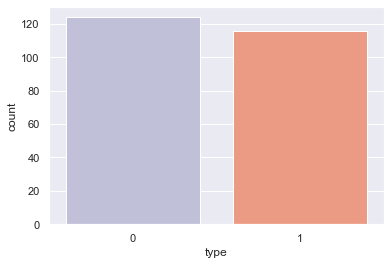

In [118]:
sns.countplot(x=df['type'],data=df,palette=["#bcbddc", "#fc9272"])

In [119]:
print(df.head(25))

     feml    tibl  tibw   tarl  tarw  type
0   41.81    5.50  4.03  38.70  3.84     1
1   47.04   80.22  4.51  41.50  4.01     1
2   43.07   75.35  4.04  38.31  3.34     1
3   40.04   69.17  3.40  35.78  3.41     1
4   33.95   56.27  2.96  31.88  3.13     1
5   49.52   56.95  2.73  29.07  2.83     1
6   42.07   71.26  3.56  37.22  3.64     1
7   44.46   76.02  3.81  37.94  3.81     1
8   59.33  110.00  5.58  61.62  4.37     1
9   70.96  120.00  7.31  78.67  6.34     1
10  80.25  143.00  8.25  86.61  6.63     1
11  56.02  185.00  8.07  90.80  4.59     1
12  52.18  180.00  9.62  82.58  5.50     1
13  44.29  155.00  6.68  73.71  4.24     1
14  43.33  155.00  6.61  75.65  3.36     1
15  39.75  166.00  7.83  74.86  3.52     1
16  37.99  157.00  7.18  72.44  3.53     1
17  34.54  145.00  7.12  65.92  3.28     1
18  36.52  150.00  6.78  67.27  3.06     1
19  41.96  129.59  6.94  70.29  3.35     1
20  43.95  133.27  7.41  70.91  2.69     1
21  45.08  128.00  7.14  65.48  4.25     1
22  43.82  

# Classes

In [120]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
235    0
236    0
237    0
238    0
239    0
Name: type, Length: 240, dtype: int64


In [121]:
print(df_X)

      feml   tibl  tibw   tarl  tarw
0    41.81   5.50  4.03  38.70  3.84
1    47.04  80.22  4.51  41.50  4.01
2    43.07  75.35  4.04  38.31  3.34
3    40.04  69.17  3.40  35.78  3.41
4    33.95  56.27  2.96  31.88  3.13
..     ...    ...   ...    ...   ...
235  18.36  31.25  1.33  21.99  1.15
236  19.24  33.21  1.28  23.60  1.15
237  20.96  34.45  1.41  22.86  1.21
238  21.35  36.09  1.53  25.98  1.24
239  17.62  29.81  1.24  21.69  1.05

[240 rows x 5 columns]


In [122]:
#normalize data
df_X_norm = (df_X - df_X.mean())/df_X.std()
# Displaying DataFrame columns.
df_X_norm.columns
# Some basic information about each column in the DataFrame 
df_X_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feml    240 non-null    float64
 1   tibl    240 non-null    float64
 2   tibw    240 non-null    float64
 3   tarl    240 non-null    float64
 4   tarw    240 non-null    float64
dtypes: float64(5)
memory usage: 9.5 KB


# Observations and variables

In [123]:
observations = list(df_X.index)
print(observations)
variables = list(df_X.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### Data Visualization

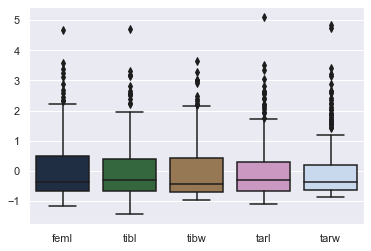

In [124]:
ax = sns.boxplot(data=df_X_norm, orient="v", palette="cubehelix")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

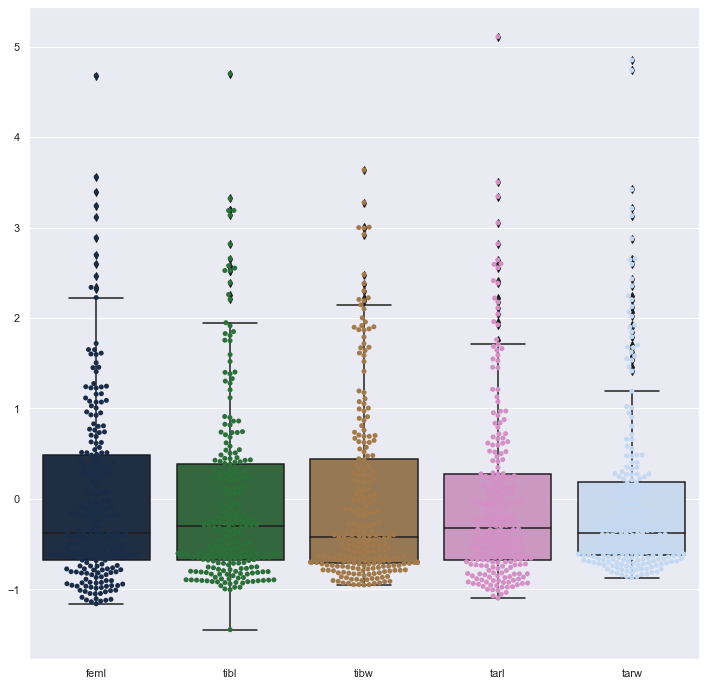

In [125]:
##Use swarmplot() or stripplot to show the datapoints on top of the boxes:
plt. figure(figsize=(12,12))    
ax=sns.swarmplot(data=df_X_norm, orient="v", palette="cubehelix")
ax = sns.boxplot(data=df_X_norm, orient="v", palette="cubehelix")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

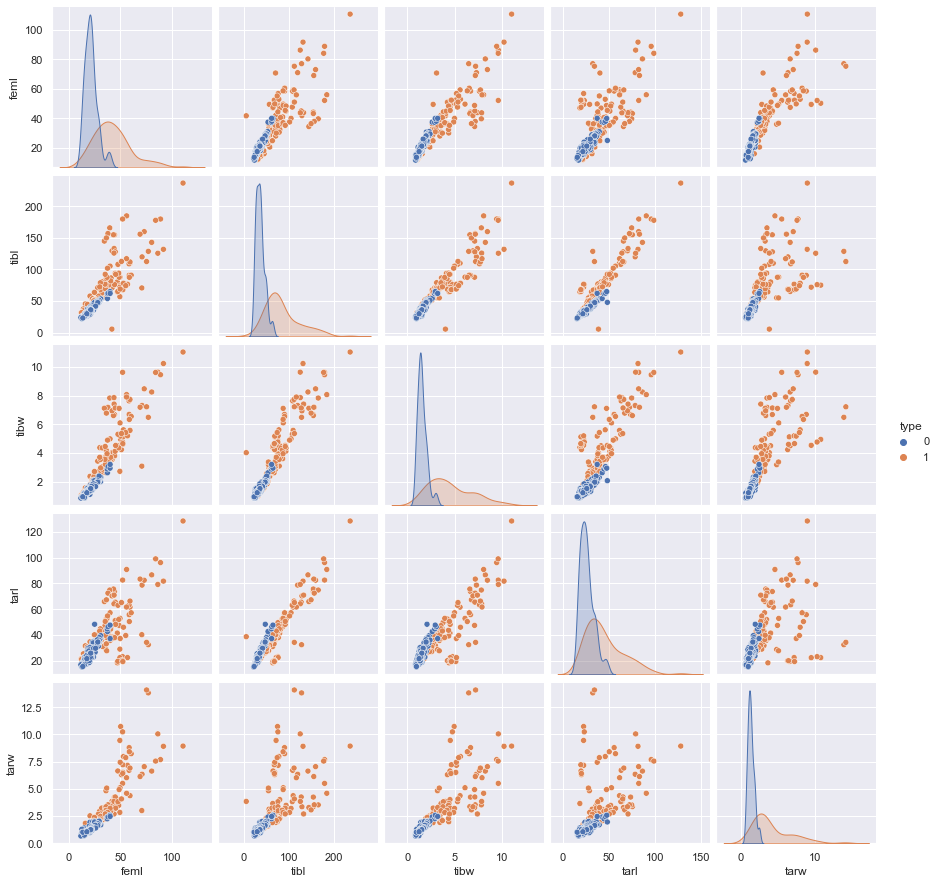

In [76]:
#pairplot
sns.pairplot(data=df ,hue='type')

# Covariance/Correlation

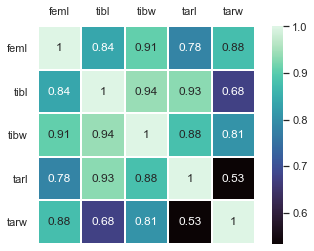

In [108]:
dfc = (df_X_norm)-(df_X_norm.mean())  #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap="mako", linewidths=0.8, annot=True, cbar=True, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.title('Covariance matrix')

# Principal component analysis (PCA)

In [126]:
pca = PCA()
# pca.fit(X_train)
Z = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)
# scaler = StandardScaler()
# Z = scaler.fit_transform(Z)
Lambda = pca.explained_variance_ 



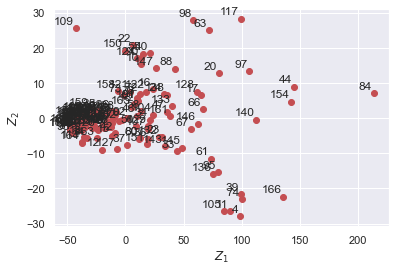

In [127]:

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

In [128]:
# z1  = Z[:,0]
# z2 = Z[:,1]
# plt.figure()
# fig = plt.figure(1, figsize=(14, 14), frameon=False, dpi=100)

# A1 = A[:,0] 
# A2 = A[:,1]
# Z1 = Z[:,0] 
# Z2 = Z[:,1]

# plt. figure()
# for i in range(len(A1)):
# # arrows project features as vectors onto PC axes
#     plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
#               color='r', width=0.0005, head_width=0.0025)
#     plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')
# sns.scatterplot(x=z1, y=z2, hue=y_train)
# plt.xlabel('$Z_1$')
# plt.ylabel('$Z_2$')
# plt.show()
# for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#         textcoords='offset points', ha='right', va='bottom')

# Eigenvectors

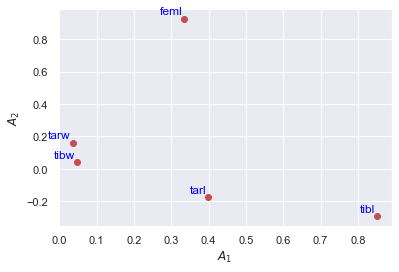

In [129]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom',color='blue')

C:\Users\Mahsa_noori\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


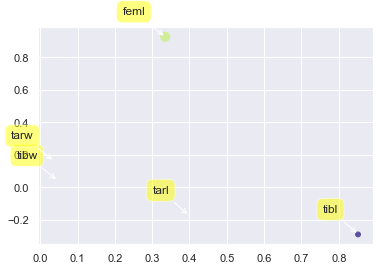

In [130]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Scree plot

Text(0, 0.5, 'Explained variance')

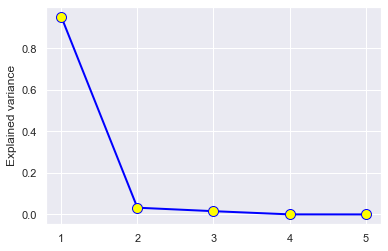

In [131]:
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-',color='blue', lw=2,marker='o',markersize='10',markerfacecolor='yellow')
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')


# Explaiend Variance

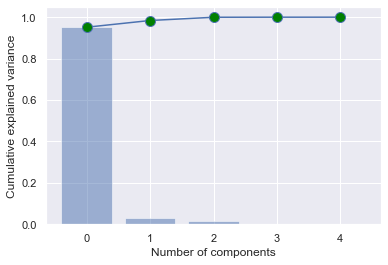

In [132]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell),marker='o',markerfacecolor='green',markersize='10')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Biplot

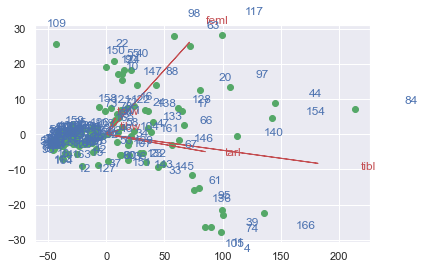

In [133]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

# Principal components

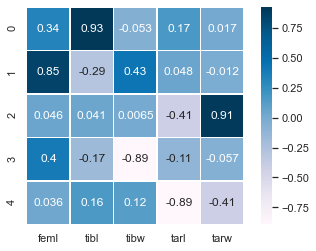

In [134]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='PuBu', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
# plt.title('Principal components')

# Hotelling's T2 test

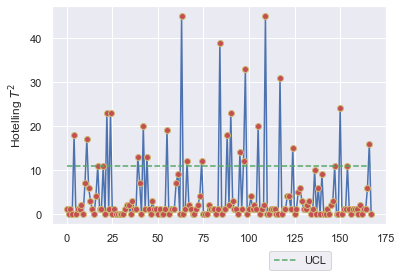

In [135]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

# Out of control points

In [136]:
print (np.argwhere(Tsquare>UCL))

[[  4]
 [ 11]
 [ 17]
 [ 20]
 [ 22]
 [ 24]
 [ 39]
 [ 42]
 [ 44]
 [ 55]
 [ 63]
 [ 66]
 [ 74]
 [ 84]
 [ 88]
 [ 90]
 [ 95]
 [ 97]
 [ 98]
 [105]
 [109]
 [117]
 [124]
 [147]
 [150]
 [154]
 [166]]


# Control Charts for Principal Components

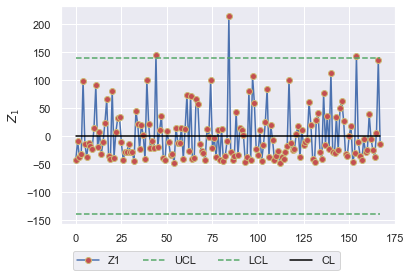

In [137]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

# Classification

In [138]:

from sklearn.linear_model import Ridge 

scoring=['accuracy']

# logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2', C=.1, class_weight='balanced')
logisticRegr = LogisticRegression(solver='lbfgs')
scores_lr_full_data = cross_validate(logisticRegr, X_train, y_train,cv=5, scoring=scoring)
scores_lr_Z = cross_validate(logisticRegr, Z, y_train,cv=5, scoring=scoring)
scores_lr_Z12 = cross_validate(logisticRegr, Z[:,:2], y_train,cv=5, scoring=scoring)


clf = tree.DecisionTreeClassifier()
scores_clf_full_data = cross_validate(clf, X_train, y_train,cv=5, scoring=scoring)
scores_clf_Z = cross_validate(clf, Z, y_train,cv=5, scoring=scoring)
scores_clf_Z12 = cross_validate(clf, Z[:,:2], y_train,cv=5, scoring=scoring)



scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["lr_full_data "+ i   ]=scores_lr_full_data[i]
  scores_dict["lr_Z  "+ i  ]=scores_lr_Z[i]
  scores_dict["lr_Z12 " + i  ]=scores_lr_Z12[i]
  
  scores_dict["clf_full_data "+ i   ]=scores_clf_full_data[i]
  scores_dict["clf_Z  "+ i  ]=scores_clf_Z[i]
  scores_dict["clf_Z12 "+ i   ]=scores_clf_Z12[i]




scores_data=pd.DataFrame(scores_dict)
scores_data

,lr_full_data fit_time,lr_Z fit_time,lr_Z12 fit_time,clf_full_data fit_time,clf_Z fit_time,clf_Z12 fit_time,lr_full_data test_accuracy,lr_Z test_accuracy,lr_Z12 test_accuracy,clf_full_data test_accuracy,clf_Z test_accuracy,clf_Z12 test_accuracy
0,0.040974,0.016988,0.007995,0.002998,0.000999,0.000999,0.852941,0.852941,0.764706,0.882353,0.941176,0.882353
1,0.025981,0.020989,0.008995,0.002998,0.000999,0.000000,0.970588,0.970588,0.941176,0.882353,0.970588,0.911765
2,0.021986,0.013992,0.007994,0.002998,0.000999,0.001999,1.000000,1.000000,0.911765,0.970588,0.970588,0.941176
3,0.020985,0.020987,0.007995,0.002998,0.000998,0.000999,0.939394,0.939394,0.757576,0.818182,0.939394,0.848485
4,0.025984,0.015990,0.008992,0.002998,0.001998,0.000999,0.909091,0.909091,0.909091,0.969697,0.969697,0.909091


In [91]:
# scores_data.to_excel('filename.xlsx')

# files.download('filename.xlsx')

# Display Coefficients- Logistic Regression

In [139]:


logisticRegr = LogisticRegression(solver='lbfgs',max_iter=1000)
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
coefficient_full = logisticRegr.coef_


np.around(coefficient_full, decimals=2)
print(score)


0.9444444444444444


# Classification Report - Logistic Regression

In [140]:
predictions_lr=logisticRegr.predict(X_test)
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.88      0.94        33

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



# Confusion Matrix-Logistic Regression

In [141]:
confusion_matrix(y_test,predictions_lr)

array([[39,  0],
       [ 4, 29]], dtype=int64)

# Display Coefficients/ Classification Report/ Confusion Matrix - Decision Trees

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
tree_clf.score = tree_clf.score(X_test,y_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_pred,y_test))
print(tree_clf.score)

[[35  4]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.91      0.88      0.90        34

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72

0.9027777777777778


### ROC for Logistic Regression

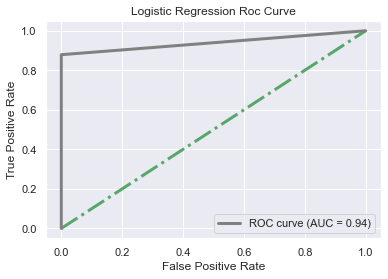

In [143]:
y_pred=logisticRegr.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k-.',c='g',lw='3')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC,lw='3',c='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Roc Curve')
plt.legend(loc="lower right")
plt.show()

### ROC for Decision Trees

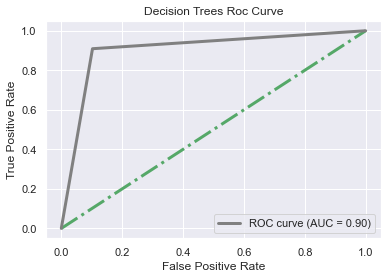

In [144]:

y_pred = tree_clf.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k-.',c='g',lw='3')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC,lw='3',c='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Trees Roc Curve')
plt.legend(loc="lower right")
plt.show()